# Mars: ground-based measurement

In this notebook we show an example of how we can use archNEMESIS to model the spectra from planetary atmospheres made using ground-based observatories and accounting for the telluric transmission and the Doppler shift. In particular, in this example we model a spectrum of the thermal emission from Mars' atmosphere, simulating a spectrum similar to what we would observe with the TEXES instrument at the NASA Infrared Telescope Facility. 

In [1]:
import archnemesis as ans
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

## 1. Input files

First of all, we read the archNEMESIS HDF5 input file and explore some of the most relevant information within the classes.

In [2]:
Atmosphere,Measurement,Spectroscopy,Scatter,Stellar,Surface,CIA,Layer,Variables,Retrieval,Telluric = ans.Files.read_input_files_hdf5('example_mars_groundbased')

nemesis :: Correcting for Doppler shift of  6.765723440871582 km/s


### Atmosphere

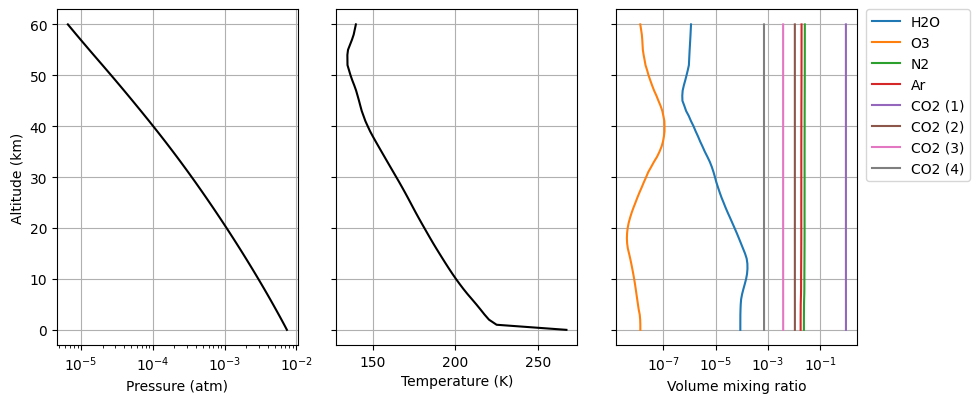

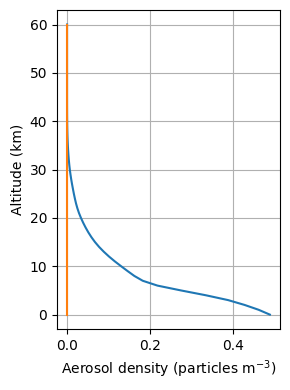

In [3]:
Atmosphere.plot_Atm()
Atmosphere.plot_Dust()

### Measurement

In [4]:
Measurement.summary_info()

Spectral resolution of the measurement (FWHM) ::  0.012
Field-of-view centered at ::  Latitude 14.684788764515385 - Longitude -28.00760060502136
There are  1 geometries in the measurement vector

GEOMETRY 1
Minimum wavelength/wavenumber ::  920.0  - Maximum wavelength/wavenumber ::  930.0007999998583
Nadir-viewing geometry. Latitude ::  14.684788764515385  - Longitude ::  -28.00760060502136  - Emission angle ::  12.391185349136796  - Solar Zenith Angle ::  3.1490142200701006  - Azimuth angle ::  78.36504288953931


### Telluric

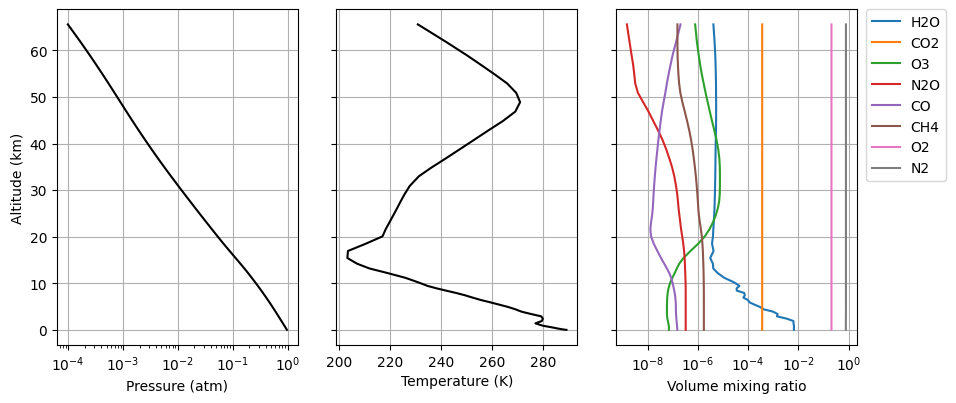

In [5]:
Telluric.Atmosphere.plot_Atm()

## 2. Calculating forward model

In this section, we are going to calculate a forward model, and then explore the contribution from different gases, the telluric transmission, and other useful parameters.

In [7]:
ForwardModel = ans.ForwardModel_0(Atmosphere=Atmosphere,Surface=Surface,Measurement=Measurement,Spectroscopy=Spectroscopy,Stellar=Stellar,Scatter=Scatter,CIA=CIA,Layer=Layer,Variables=Variables,Telluric=Telluric)
SPECONV = ForwardModel.nemesisfm()

nemesis :: Correcting for Doppler shift of  6.765723440871582 km/s
nemesis :: Correcting for Doppler shift of  6.765723440871582 km/s
warning in .pat file :: ANGLE must be 0.0 for scattering calculations - resetting
CIRSrad :: CIA not included in calculations
CIRSrad :: Aerosol optical depths at  919.9995004749508  ::  [0.12748517 0.        ]
CIRSrad :: Performing multiple scattering calculation
CIRSrad :: NF =  10 ; NMU =  5 ; NPHI =  101


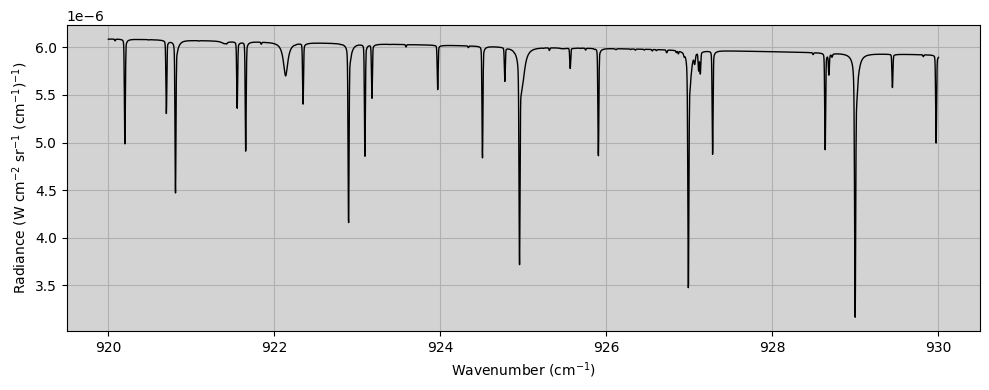

In [8]:
fig,ax1 = plt.subplots(1,1,figsize=(10,4))

ax1.plot(Measurement.VCONV[:,0],SPECONV,c='black',linewidth=1.)
ax1.grid()
ax1.set_xlabel('Wavenumber (cm$^{-1}$)')
ax1.set_ylabel('Radiance (W cm$^{-2}$ sr$^{-1}$ (cm$^{-1}$)$^{-1}$)')
ax1.set_facecolor('lightgray')
plt.tight_layout()

### 2.1. Showing the effect of the telluric transmission 

In [9]:
ForwardModel = ans.ForwardModel_0(Telluric=None,Atmosphere=Atmosphere,Surface=Surface,Measurement=Measurement,Spectroscopy=Spectroscopy,Stellar=Stellar,Scatter=Scatter,CIA=CIA,Layer=Layer,Variables=Variables)
SPECONV_notell = ForwardModel.nemesisfm()

nemesis :: Correcting for Doppler shift of  6.765723440871582 km/s
nemesis :: Correcting for Doppler shift of  6.765723440871582 km/s
warning in .pat file :: ANGLE must be 0.0 for scattering calculations - resetting
CIRSrad :: CIA not included in calculations
CIRSrad :: Aerosol optical depths at  919.9995004749508  ::  [0.12748517 0.        ]
CIRSrad :: Performing multiple scattering calculation
CIRSrad :: NF =  10 ; NMU =  5 ; NPHI =  101


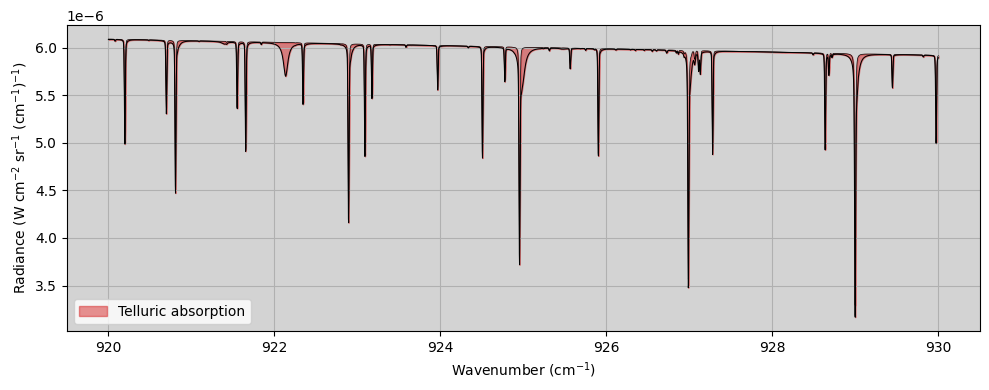

In [10]:
fig,ax1 = plt.subplots(1,1,figsize=(10,4))

ax1.plot(Measurement.VCONV[:,0],SPECONV,c='black',linewidth=0.75)
ax1.plot(Measurement.VCONV[:,0],SPECONV_notell,c='black',linewidth=0.5)
ax1.fill_between(Measurement.VCONV[:,0],SPECONV[:,0],SPECONV_notell[:,0],alpha=0.5,color='tab:red',label='Telluric absorption')
ax1.legend()
ax1.grid()
ax1.set_xlabel('Wavenumber (cm$^{-1}$)')
ax1.set_ylabel('Radiance (W cm$^{-2}$ sr$^{-1}$ (cm$^{-1}$)$^{-1}$)')
ax1.set_facecolor('lightgray')
plt.tight_layout()

### 2.2. Showing the contribution from different gases to the spectrum

In [11]:
#Getting the location of the lbl-tables
lbltables = Spectroscopy.LOCATION
nfm = len(lbltables)

SPECONV_gas = np.zeros((Measurement.NCONV[0],Measurement.NGEOM,nfm))
for i in range(nfm):

    #Defining only one gas in the spectroscopy
    Spectroscopy1 = deepcopy(Spectroscopy)
    Spectroscopy1.NGAS = 1
    Spectroscopy1.LOCATION = [lbltables[i]]
    Spectroscopy1.ID = [Spectroscopy.ID[i]]
    Spectroscopy1.ISO = [Spectroscopy.ISO[i]]
    Spectroscopy1.read_tables(wavemin=Measurement.WAVE.min(),wavemax=Measurement.WAVE.max())

    #Running the forward model
    ForwardModel = ans.ForwardModel_0(Atmosphere=Atmosphere,Surface=Surface,Measurement=Measurement,Spectroscopy=Spectroscopy1,Stellar=Stellar,Scatter=Scatter,CIA=CIA,Layer=Layer,Variables=Variables)
    SPECONV1 = ForwardModel.nemesisfm()

    #Saving the results
    SPECONV_gas[:,:,i] = SPECONV1[:,:]

nemesis :: Correcting for Doppler shift of  6.765723440871582 km/s
nemesis :: Correcting for Doppler shift of  6.765723440871582 km/s
warning in .pat file :: ANGLE must be 0.0 for scattering calculations - resetting
CIRSrad :: CIA not included in calculations
CIRSrad :: Aerosol optical depths at  919.9995004749508  ::  [0.12748517 0.        ]
CIRSrad :: Performing multiple scattering calculation
CIRSrad :: NF =  10 ; NMU =  5 ; NPHI =  101
nemesis :: Correcting for Doppler shift of  6.765723440871582 km/s
nemesis :: Correcting for Doppler shift of  6.765723440871582 km/s
warning in .pat file :: ANGLE must be 0.0 for scattering calculations - resetting
CIRSrad :: CIA not included in calculations
CIRSrad :: Aerosol optical depths at  919.9995004749508  ::  [0.12748517 0.        ]
CIRSrad :: Performing multiple scattering calculation
CIRSrad :: NF =  10 ; NMU =  5 ; NPHI =  101


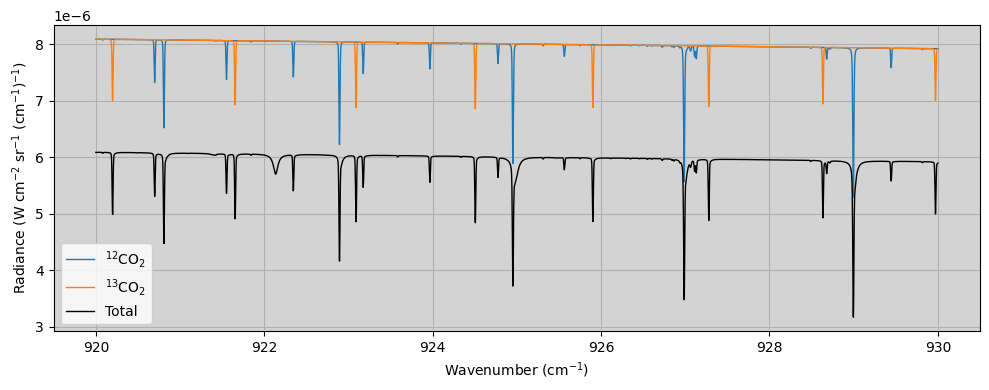

In [12]:
fig,ax1 = plt.subplots(1,1,figsize=(10,4))

offset = 2.e-6

for i in range(Spectroscopy.NGAS):

    if((Spectroscopy.ID[i]==2) & (Spectroscopy.ISO[i]==1)):
        label='$^{12}$CO$_2$'
    elif((Spectroscopy.ID[i]==2) & (Spectroscopy.ISO[i]==2)):
        label='$^{13}$CO$_2$'
    
    ax1.plot(Measurement.VCONV[:,0],SPECONV_gas[:,0,i]+offset,linewidth=1.,label=label)

ax1.plot(Measurement.VCONV[:,0],SPECONV,c='black',linewidth=1.,label='Total')

#ax1.plot(Measurement.VCONV[:,0],SPECONV_notell,c='black',linewidth=0.5)
#ax1.fill_between(Measurement.VCONV[:,0],SPECONV[:,0],SPECONV_notell[:,0],alpha=0.5,color='tab:red',label='Telluric absorption')
ax1.legend()
ax1.grid()
ax1.set_xlabel('Wavenumber (cm$^{-1}$)')
ax1.set_ylabel('Radiance (W cm$^{-2}$ sr$^{-1}$ (cm$^{-1}$)$^{-1}$)')
ax1.set_facecolor('lightgray')
plt.tight_layout()

### 2.3. Showing the effect of multiple scattering

In [13]:
Scatter.ISCAT = 0   #No scattering, only thermal emission
ForwardModel = ans.ForwardModel_0(Telluric=Telluric,Atmosphere=Atmosphere,Surface=Surface,Measurement=Measurement,Spectroscopy=Spectroscopy,Stellar=Stellar,Scatter=Scatter,CIA=CIA,Layer=Layer,Variables=Variables)
SPECONV_noscat = ForwardModel.nemesisfm()
Scatter.ISCAT = 1   #Resetting to multiple scattering

nemesis :: Correcting for Doppler shift of  6.765723440871582 km/s
nemesis :: Correcting for Doppler shift of  6.765723440871582 km/s
CIRSrad :: CIA not included in calculations
CIRSrad :: Aerosol optical depths at  919.9995004749508  ::  [0.12748517 0.        ]
CIRSrad :: Performing thermal emission calculation


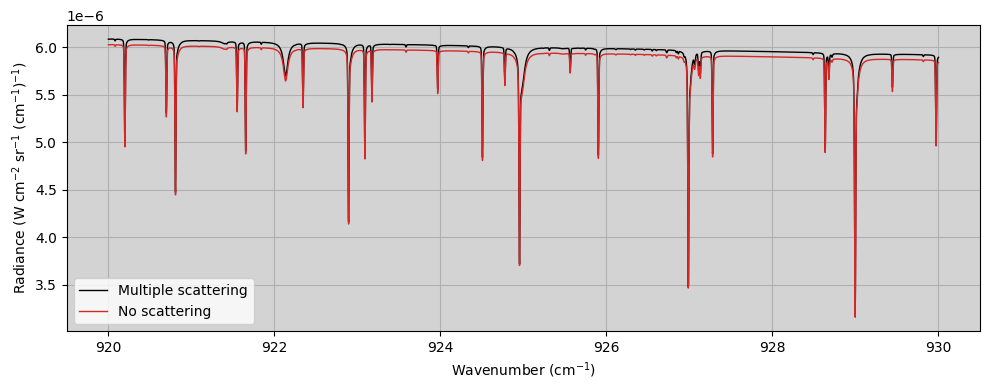

In [14]:
fig,ax1 = plt.subplots(1,1,figsize=(10,4))

ax1.plot(Measurement.VCONV[:,0],SPECONV,c='black',linewidth=1.,label='Multiple scattering')
ax1.plot(Measurement.VCONV[:,0],SPECONV_noscat,c='tab:red',linewidth=1.,label='No scattering')
ax1.legend()
ax1.grid()
ax1.set_xlabel('Wavenumber (cm$^{-1}$)')
ax1.set_ylabel('Radiance (W cm$^{-2}$ sr$^{-1}$ (cm$^{-1}$)$^{-1}$)')
ax1.set_facecolor('lightgray')
plt.tight_layout()